# Background: 
Uber Technologies, Inc. is an American multinational transportation network company based in San Francisco and has operations in over 785 metropolitan areas worldwide with over 110 million users worldwide. Ridesharing is a very volatile market and demand fluctuates wildly with time, place, weather, local events, etc. The key to being successful in this business is to be able to detect patterns in these fluctuations and cater to the demand at any given time. As a newly hired Junior Data Scientist in Uber’s New York Office, you have been given the task of extracting insights from data that will help the business grow. Good insights are ones which are actionable and make business sense.

# Objective: 
To extract actionable insights that will enable growth in the market

# Key Questions:
1. What are the different variables that influence pickups?
2. Which factor affects the pickups the most? What could be plausible reasons for that?
3. What are your recommendations to Uber management to capitalize on fluctuating demand?

# Data:
The data contains weather information, location and no. of pickups

* pickup_dt: Date and time of the pick up.
* borough: NYC's borough.
* pickups: Number of pickups for the period.
* spd: Wind speed in miles/hour.
* vsb: Visibility in miles to nearest tenth.
* temp: Temperature in Fahrenheit.
* dewp: Dew point in Fahrenheit.
* slp: Sea level pressure.
* pcp01: 1-hour liquid precipitation.
* pcp06: 6-hour liquid precipitation.
* pcp24: 24-hour liquid precipitation.
* sd: Snow depth in inches.
* hday: Being a holiday (Y) or not (N).

### Import the necessary libraries - pandas, numpy, seaborn, matplotlib.pyplot

In [1]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
import seaborn as sns

### Read in the dataset

Sometimes it is beneficial to read a portion of the file first before attempting to load the entire dataset. This is especially true for large datasets (millions of rows) in which we may need to do some preprocessing.

With large datasets it is preferential to specify the datatypes of the columns in order to optimize memory usage. So let's read in the first 10 rows of the file and see what the data looks like. Alternatively we could open up the CSV itself but in cases where the file is large it may take up too much memory to even open it.

In [2]:
first_10_rows = pd.read_csv('Uber.csv', nrows=10)
first_10_rows.head(10)

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5,10,30,7,1023.5,0,0,0,0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5,10,30,7,1023.5,0,0,0,0,Y
2,2015-01-01 01:00:00,EWR,0,5,10,30,7,1023.5,0,0,0,0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5,10,30,7,1023.5,0,0,0,0,Y
4,2015-01-01 01:00:00,Queens,405,5,10,30,7,1023.5,0,0,0,0,Y
5,2015-01-01 01:00:00,Staten Island,6,5,10,30,7,1023.5,0,0,0,0,Y
6,2015-01-01 01:00:00,NaN,4,5,10,30,7,1023.5,0,0,0,0,Y
7,2015-01-01 02:00:00,Bronx,120,3,10,30,6,1023.0,0,0,0,0,Y
8,2015-01-01 02:00:00,Brooklyn,1229,3,10,30,6,1023.0,0,0,0,0,Y
9,2015-01-01 02:00:00,EWR,0,3,10,30,6,1023.0,0,0,0,0,Y


### Some notes about the data

The 'pickup_dt' variable should be stored as a datetime, 'borough' & 'hday' should be a category. Let's see how they are stored.

In [3]:
first_10_rows.dtypes

pickup_dt     object
borough       object
pickups        int64
spd            int64
vsb            int64
temp           int64
dewp           int64
slp          float64
pcp01          int64
pcp06          int64
pcp24          int64
sd             int64
hday          object
dtype: object

We can fix this by specifying a few arguments in read_csv. We will need the arguments dtype and parse_dates.

Furthermore we need a new datatype called defaultdict which is incredibly useful.

In [10]:
d = {'a': 'A', 'b': 'B', 'c': 'C'}

from collections import defaultdict

def f():
    return 'No record'

dictionary = defaultdict(int, d)
dictionary['there should be 0']

0

In [9]:
from collections import defaultdict

path_to_csv = 'Uber.csv'

dtype_dict = defaultdict(float, {
    # Tell read_csv pickup_dt is a string so it nows to parse the date from the string
    'pickup_dt': 'str',
    # Specify these two as categorical variables
    'borough': 'category',
    'hday': 'category',
    # Intuitively this should be an int so we can specify
    'pickups':'int64'})

uber = pd.read_csv(filepath_or_buffer=path_to_csv,
                   # Telling read_csv which row is the header
                   header=0,
                   # Tells read_csv which columns to parse as dates
                   parse_dates=['pickup_dt'],
                   # Pass in 
                   dtype=dtype_dict)
uber.dtypes

pickup_dt    datetime64[ns]
borough            category
pickups               int64
spd                 float64
vsb                 float64
temp                float64
dewp                float64
slp                 float64
pcp01               float64
pcp06               float64
pcp24               float64
sd                  float64
hday               category
dtype: object

### View the first few rows of the dataset

In [25]:
# looking at head (5 observations) 
uber.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


**Observations**
* pickup_dt contains date and time of pickup 
* borough contains the name of the New York borough the pickup was made in
* pickups contain the number of pickups in the borough at the given time 
* All the weather related variables are numerical
* The variable holiday is a categorical variable

### Check the shape of the dataset

In [26]:
uber.shape

(29101, 13)

* The dataset has 29101 rows and 13 columns.

### Check the dataframe info

In [27]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   pickup_dt  29101 non-null  datetime64[ns]
 1   borough    26058 non-null  category      
 2   pickups    29101 non-null  int64         
 3   spd        29101 non-null  float64       
 4   vsb        29101 non-null  float64       
 5   temp       29101 non-null  float64       
 6   dewp       29101 non-null  float64       
 7   slp        29101 non-null  float64       
 8   pcp01      29101 non-null  float64       
 9   pcp06      29101 non-null  float64       
 10  pcp24      29101 non-null  float64       
 11  sd         29101 non-null  float64       
 12  hday       29101 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(9), int64(1)
memory usage: 2.5 MB


**Observations**
* All column have 29101 observations except borough which has 26058 observations indicating that there are missing values in it.
* Pickup_dt is read as object but it should have data type - datetime
* borough and hday (holiday) should be  categorical varaibles 

# Data Preprocessing

In [35]:
uber.describe(include='all', datetime_is_numeric=True)

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
count,29101,26058,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101
unique,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
freq,NaN,4343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27980
mean,2015-04-02 01:22:19.005532416,NaN,490.215903,5.984924,8.818125,47.669042,30.823065,1017.817938,0.003830,0.026129,0.090464,2.529169,NaN
min,2015-01-01 01:00:00,NaN,0.000000,0.000000,0.000000,2.000000,-16.000000,991.400000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2015-02-15 21:00:00,NaN,1.000000,3.000000,9.100000,32.000000,14.000000,1012.500000,0.000000,0.000000,0.000000,0.000000,NaN
50%,2015-04-02 07:00:00,NaN,54.000000,6.000000,10.000000,46.000000,30.000000,1018.200000,0.000000,0.000000,0.000000,0.000000,NaN
75%,2015-05-17 11:00:00,NaN,449.000000,8.000000,10.000000,64.500000,50.000000,1022.900000,0.000000,0.000000,0.050000,2.958333,NaN
max,2015-06-30 23:00:00,NaN,7883.000000,21.000000,10.000000,89.000000,73.000000,1043.400000,0.280000,1.240000,2.100000,19.000000,NaN


In [21]:
uber['borough'].mode()

0            Bronx
1         Brooklyn
2              EWR
3        Manhattan
4           Queens
5    Staten Island
Name: borough, dtype: category
Categories (6, object): ['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island']

In [22]:
# Why does 'borough' have lower count than the other variables?
uber['borough'].isnull().sum()

3043

In [40]:
uber.isnull().sum()

pickup_dt       0
borough      3043
pickups         0
spd             0
vsb             0
temp            0
dewp            0
slp             0
pcp01           0
pcp06           0
pcp24           0
sd              0
hday            0
dtype: int64

In [27]:
# Replacing NaN with Unknown
#uber['borough'] = uber['borough'].cat.add_categories('Unknown')

# fill the null values with 'Unknown', edits original series
uber['borough'].fillna('Unknown', inplace=True)

# These statements are the same, inplace=False produces new series
uber['borough'] = uber['borough'].fillna('Unknown', inplace=False)

# uber['borough'].value_counts()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
5,2015-01-01 01:00:00,Staten Island,6,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
6,2015-01-01 01:00:00,Unknown,4,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
7,2015-01-01 02:00:00,Bronx,120,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,Y
8,2015-01-01 02:00:00,Brooklyn,1229,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,Y
9,2015-01-01 02:00:00,EWR,0,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,Y


In [28]:
uber['borough'].value_counts()

Bronx            4343
Brooklyn         4343
EWR              4343
Manhattan        4343
Queens           4343
Staten Island    4343
Unknown          3043
Name: borough, dtype: int64


**Observations**
* Pick up date starts from 1-jan -2015 to 30-june-2015, therefore we have 6 months data
* borough has 6 unique categories
* borough has 3043 null values (replace with 'Unknown' category), all other variables have none

### Feature Creation
### Extracting date parts from pickup date

In [29]:
# Extracting date parts from pickup date
uber['start_year'] = uber['pickup_dt'].dt.year
uber['start_month'] = uber['pickup_dt'].dt.month_name().astype(
    pd.CategoricalDtype(categories=['January', 'February', 'March', 'April', 'May', 'June'], 
                        ordered=True))
uber['start_hour'] = uber['pickup_dt'].dt.hour
uber['start_day'] = uber['pickup_dt'].dt.day
uber['week_day'] = uber['pickup_dt'].dt.day_name().astype(
    pd.CategoricalDtype(
        categories=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
        ordered=True))

In [30]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   pickup_dt    29101 non-null  datetime64[ns]
 1   borough      29101 non-null  category      
 2   pickups      29101 non-null  int64         
 3   spd          29101 non-null  float64       
 4   vsb          29101 non-null  float64       
 5   temp         29101 non-null  float64       
 6   dewp         29101 non-null  float64       
 7   slp          29101 non-null  float64       
 8   pcp01        29101 non-null  float64       
 9   pcp06        29101 non-null  float64       
 10  pcp24        29101 non-null  float64       
 11  sd           29101 non-null  float64       
 12  hday         29101 non-null  category      
 13  start_year   29101 non-null  int64         
 14  start_month  29101 non-null  category      
 15  start_hour   29101 non-null  int64         
 16  star

In [47]:
uber.describe(include='all', datetime_is_numeric=True)

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,start_year,start_month,start_hour,start_day,week_day
count,29101,26058,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101,29101.0,29101,29101.000000,29101.00000,29101
unique,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,6,NaN,NaN,7
top,NaN,Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,May,NaN,NaN,Friday
freq,NaN,4343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27980,NaN,5058,NaN,NaN,4219
mean,2015-04-02 01:22:19.005532416,NaN,490.215903,5.984924,8.818125,47.669042,30.823065,1017.817938,0.003830,0.026129,0.090464,2.529169,NaN,2015.0,NaN,11.597574,15.62314,NaN
min,2015-01-01 01:00:00,NaN,0.000000,0.000000,0.000000,2.000000,-16.000000,991.400000,0.000000,0.000000,0.000000,0.000000,NaN,2015.0,NaN,0.000000,1.00000,NaN
25%,2015-02-15 21:00:00,NaN,1.000000,3.000000,9.100000,32.000000,14.000000,1012.500000,0.000000,0.000000,0.000000,0.000000,NaN,2015.0,NaN,6.000000,8.00000,NaN
50%,2015-04-02 07:00:00,NaN,54.000000,6.000000,10.000000,46.000000,30.000000,1018.200000,0.000000,0.000000,0.000000,0.000000,NaN,2015.0,NaN,12.000000,16.00000,NaN
75%,2015-05-17 11:00:00,NaN,449.000000,8.000000,10.000000,64.500000,50.000000,1022.900000,0.000000,0.000000,0.050000,2.958333,NaN,2015.0,NaN,18.000000,23.00000,NaN
max,2015-06-30 23:00:00,NaN,7883.000000,21.000000,10.000000,89.000000,73.000000,1043.400000,0.280000,1.240000,2.100000,19.000000,NaN,2015.0,NaN,23.000000,31.00000,NaN


# EDA

### Let us explore the numerical variables first

In [35]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# This function creates a boxplot and histogram for any numerical feature
# This helps us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default None / auto)
    """
    # creating the 2 subplots
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {'height_ratios': (.25, .75)}, 
                                           figsize = figsize 
                                           ) 
    # boxplot will be created and a star will indicate the mean value of the column
    sns.boxplot(data=feature,
                ax=ax_box2,
                showmeans=True,
                color='red',
                orient='h')
    # For histogram
    sns.histplot(data=feature,
                 kde=F,
                 ax=ax_hist2,
                 bins=bins) if bins else sns.histplot(feature,
                                                      kde=False,
                                                      ax=ax_hist2)
    # Add mean to the histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--')
    # Add median to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-')

## Observations on Pickups

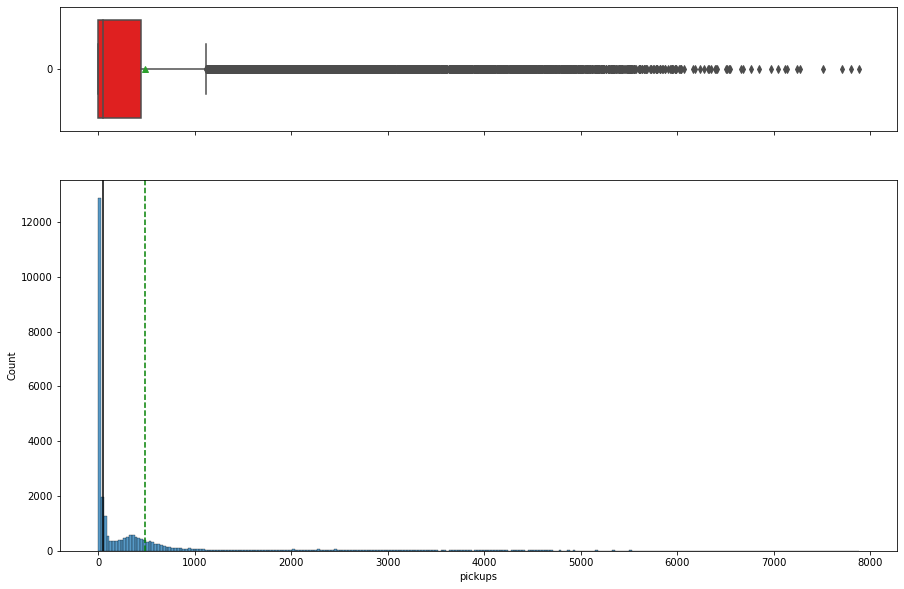

In [78]:
histogram_boxplot(uber['pickups'])

In [31]:
uber[uber['pickups'] == 0].shape

(5567, 18)

**Observations**
* The distribution of hourly pickups is highly right skewed
* Majority of the hourly pickups are close to 0
* Median pickups = 0 but the mean is ~500 
* There are a lot of outliers in this variable. 
* While most hourly pickups are at lower end, we have observations where hourly pickups went as high as 8000

##  Observations on Visibility

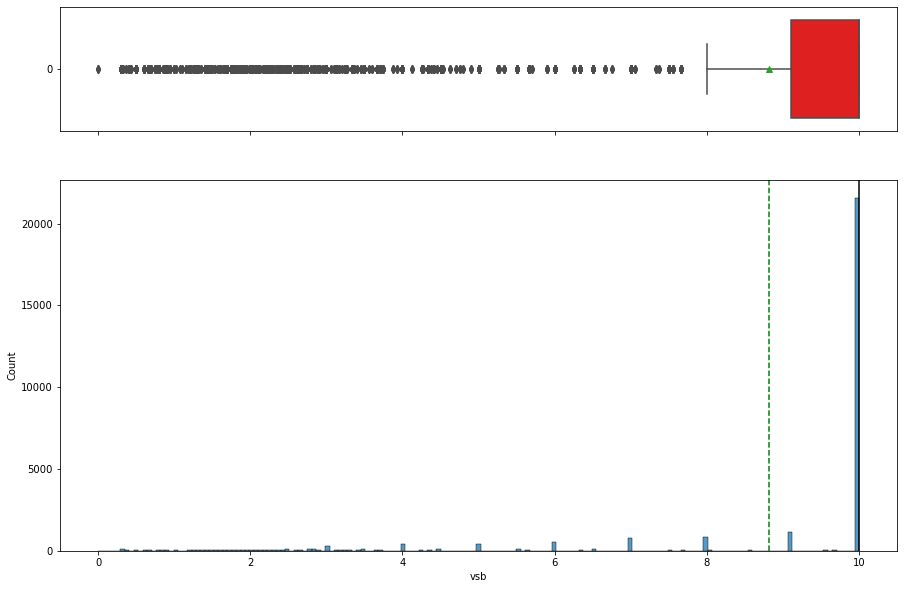

In [79]:
histogram_boxplot(uber['vsb'])

**Observations**
* visibility  is left skewed
* Both the mean and median are high indicating that the visibility is good on most days
* There are however outliers towards the left, indicating that visibility is extremely low on some days.
* It will be interesting to see how visibility  affects the uber pickup frequency

## Observations on Temperature

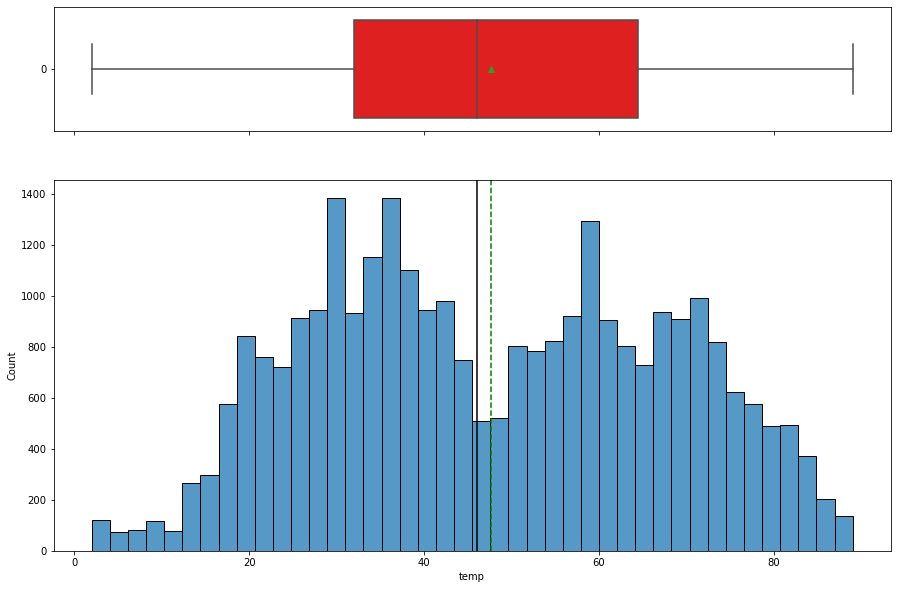

In [82]:
histogram_boxplot(uber['temp'])

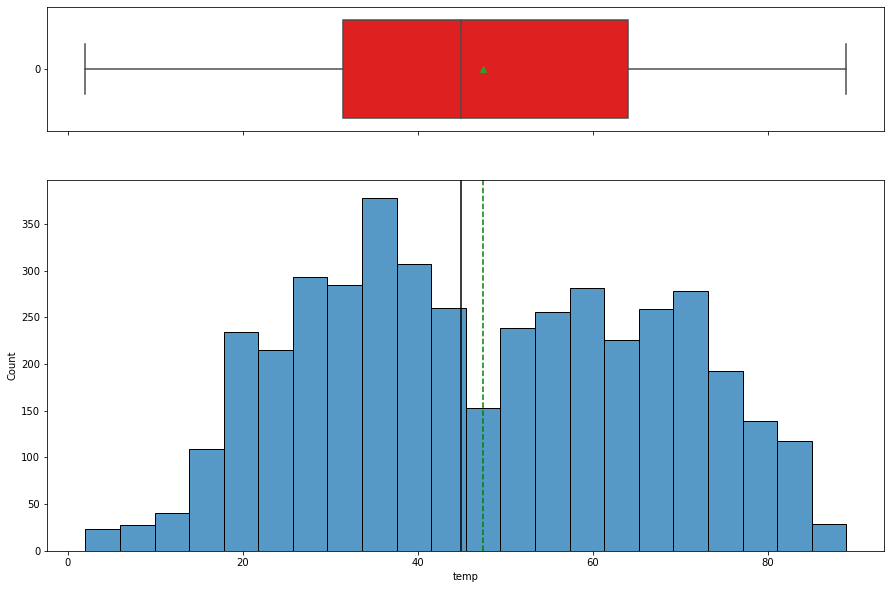

In [36]:
temp_by_hour = uber.groupby('pickup_dt')['temp'].mean()
histogram_boxplot(temp_by_hour)

**Observations**
* Temperature does not have any outliers.
* Two peaks (Bi-modal) can be seen for temp, one at around 35F other at around 60F. The hump is greater at 35F (~1.5 C) indicating cold weather conditions.

## Observations on Dew point

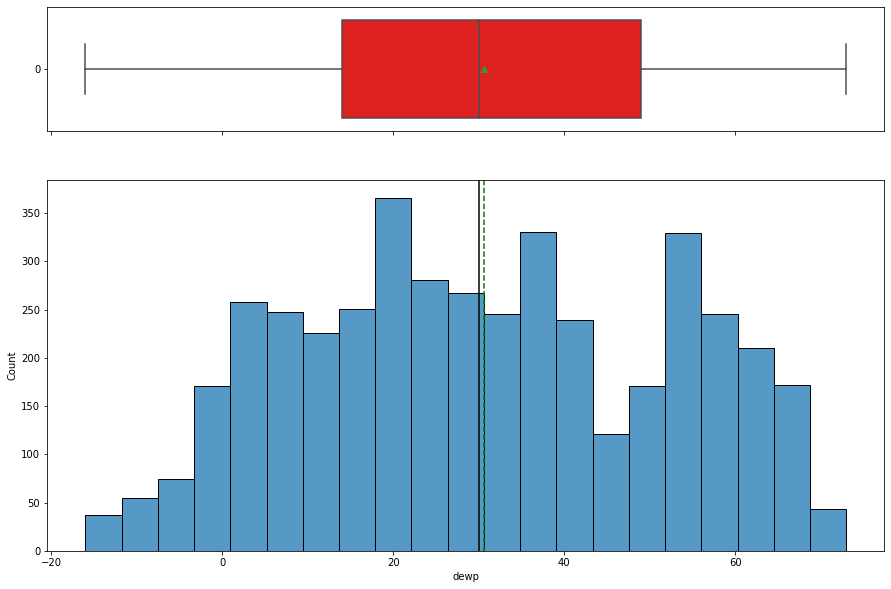

In [39]:
weather_vars = ['spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01', 'pcp06', 'pcp24', 'sd']

weather_by_hour = uber.groupby('pickup_dt')[weather_vars].mean()

weather_by_hour.head()

histogram_boxplot(weather_by_hour['dewp'])

**Observations**
* There are no outliers for dew point either.
* The distribution is similar to that of temperature. It suggests possible correlation between the two variables.
* Dew point is an indication of humidity, which is correlated with temperature.

## Observations on Sea level pressure

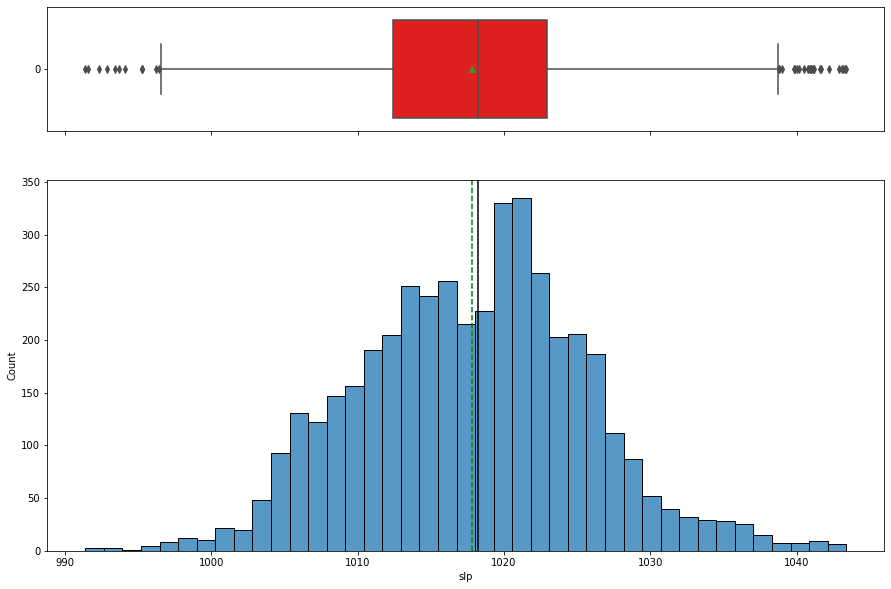

In [40]:
histogram_boxplot(weather_by_hour['slp'])

**Observations**
* Sea level pressure distribution is close to normal.
* There are a few outliers on both the ends.

##  Observations on Liquid Precipitation (Rain)

1 hour liquid precipitation

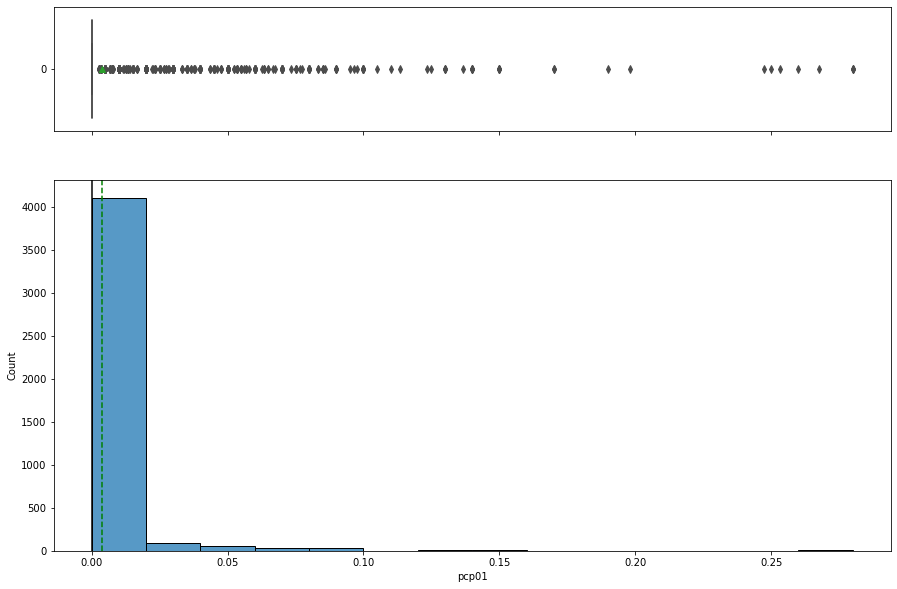

In [41]:
histogram_boxplot(weather_by_hour['pcp01'])

6 hour liquid precipitation

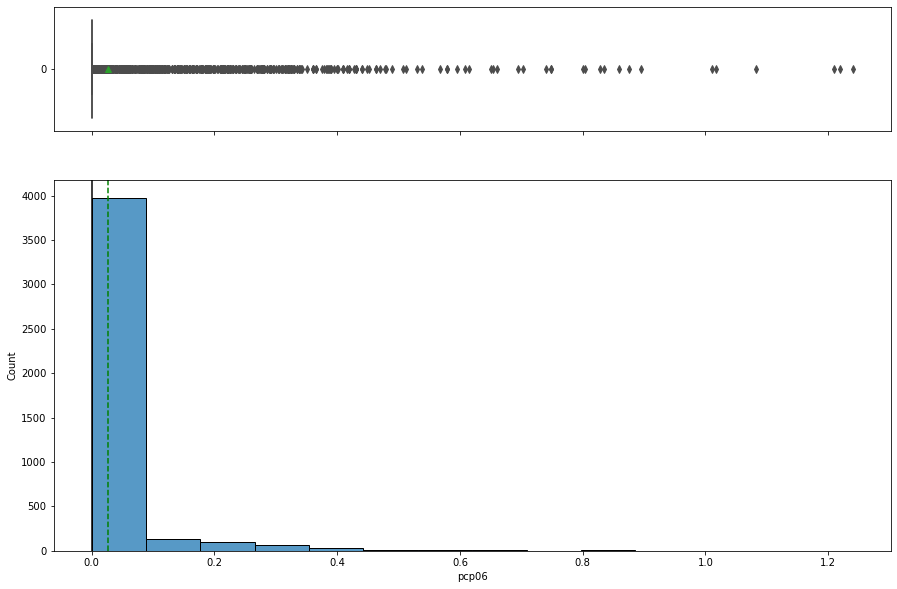

In [42]:
histogram_boxplot(weather_by_hour['pcp06'])

* 24 hour liquid precipitation

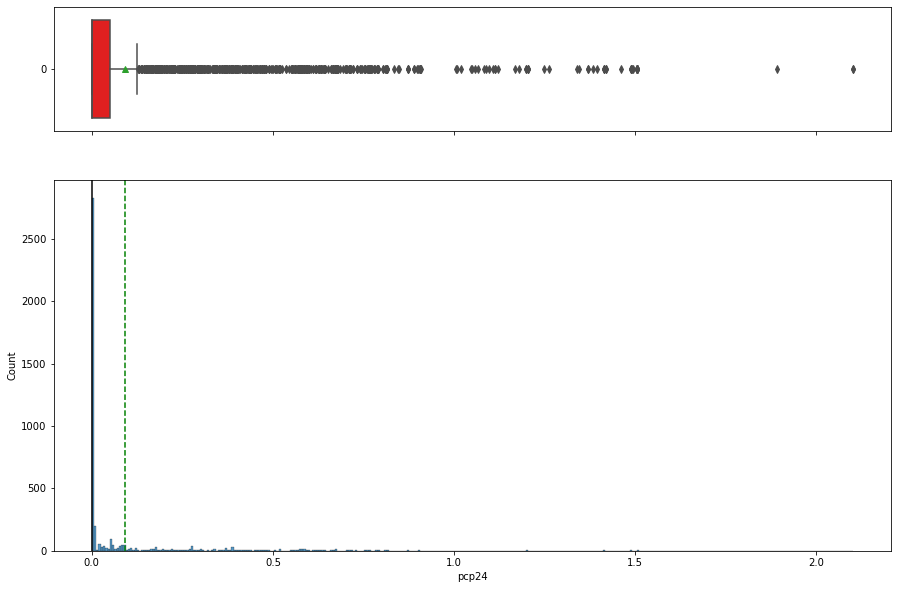

In [43]:
histogram_boxplot(weather_by_hour['pcp24'])

**Observations**
* As expected, it rains on relatively fewer days in New York.
* Most of the days are dry.
* When it rains, and sometimes when it rains heavily, we get outliers.

## Observations on Snow Depth

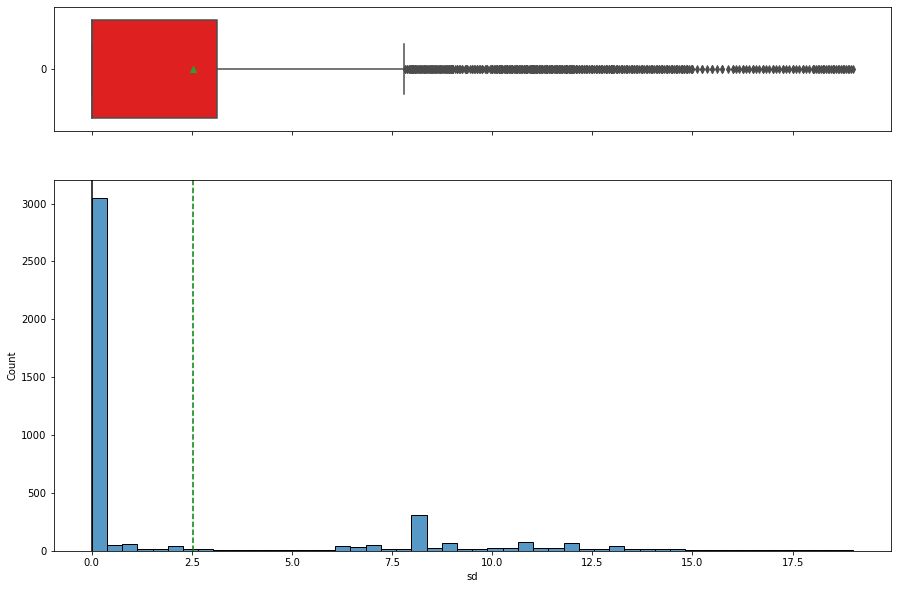

In [44]:
histogram_boxplot(weather_by_hour['sd'])

**Observations**
* We do observe there is snowfall in the time period that we are analysing.
* There are outliers in this data.
* We will have to see how snowfall affects pickups. We know that very few people are likely to get out if it is snowing heavily, so our pickups will decrease when it snows. 

### Let us explore the categorical variables now

In [152]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    # Set figure size and initialize catplot
    catplot = sns.catplot(data=uber, x=feature.name, kind='count')
    
    # We will need the categories & total length of the feature
    categories = feature.cat.categories
    nrows = len(feature)
    
    # this pairs each bar with corresponding category
    bar_category_map = zip(catplot.ax.patches, categories)
    for (bar, cat) in bar_category_map:
        # number of observations in cat
        class_total = len(feature[feature == cat])
        # For formatting the text
        height = bar.get_height()
        # adding text to plot above bar
        catplot.ax.text(bar.get_x(), height + 3, '{:1.2f}'.format(class_total / nrows))
    return catplot

In [153]:
x = (1, 2, 3)
y = (1, 2, 3)
list(zip(x,y))

[(1, 1), (2, 2), (3, 3)]

### Observations on holiday

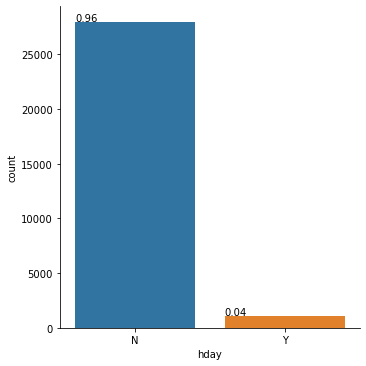

In [154]:
bar_perc(uber['hday'])

**Observations**
* 3.9% of days were holidays.

### Observations on borough

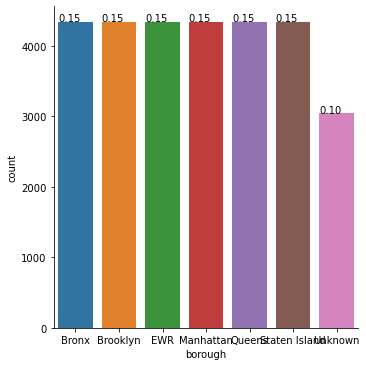

In [155]:
bar_perc(uber['borough'])

* The observations are uniformly distributed across the boroughs except the observations that had a NaN values and were attributed to Unknown borough.

## Bivariate Analysis

Plot bivariate charts between variables to understand their interaction with each other.

### Correlation

In [169]:
uber.dtypes[(uber.dtypes == 'float64') | (uber.dtypes == 'int64')].index

Index(['pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01', 'pcp06',
       'pcp24', 'sd', 'start_year', 'start_hour', 'start_day'],
      dtype='object')

<AxesSubplot:>

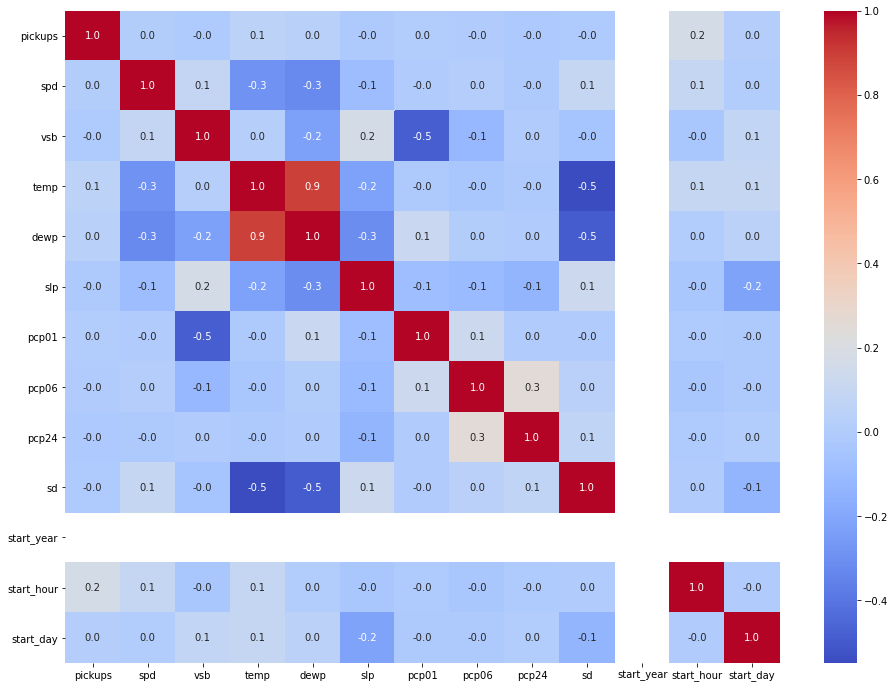

In [171]:
# Check for correlation among numerical variables
num_var = uber.dtypes[(uber.dtypes == 'float64') | (uber.dtypes == 'int64')].index

corr = uber[num_var].corr()

# plot the heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True,cmap='coolwarm',
        fmt=".1f",
        xticklabels=corr.columns,
        yticklabels=corr.columns)

I want to just view the weather variables and assess their relationship with each other.

<AxesSubplot:>

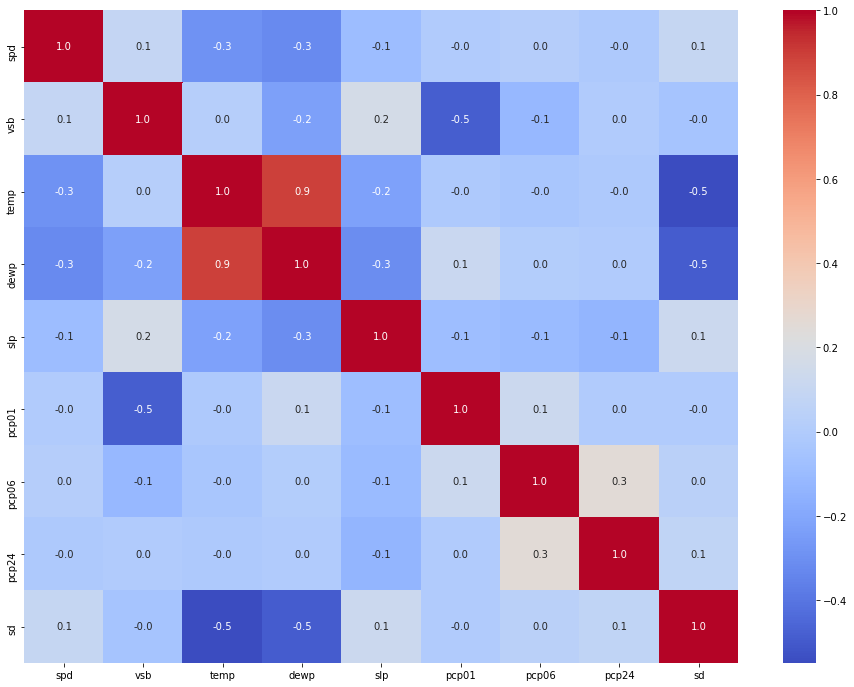

In [203]:
weather_vars = ['spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01', 'pcp06', 'pcp24', 'sd']
weather_corr = uber[weather_vars].corr()
# plot the heatmap
plt.figure(figsize=(16,12))
sns.heatmap(weather_corr, annot=True,cmap='coolwarm',
        fmt=".1f",
        xticklabels=weather_corr.columns,
        yticklabels=weather_corr.columns)

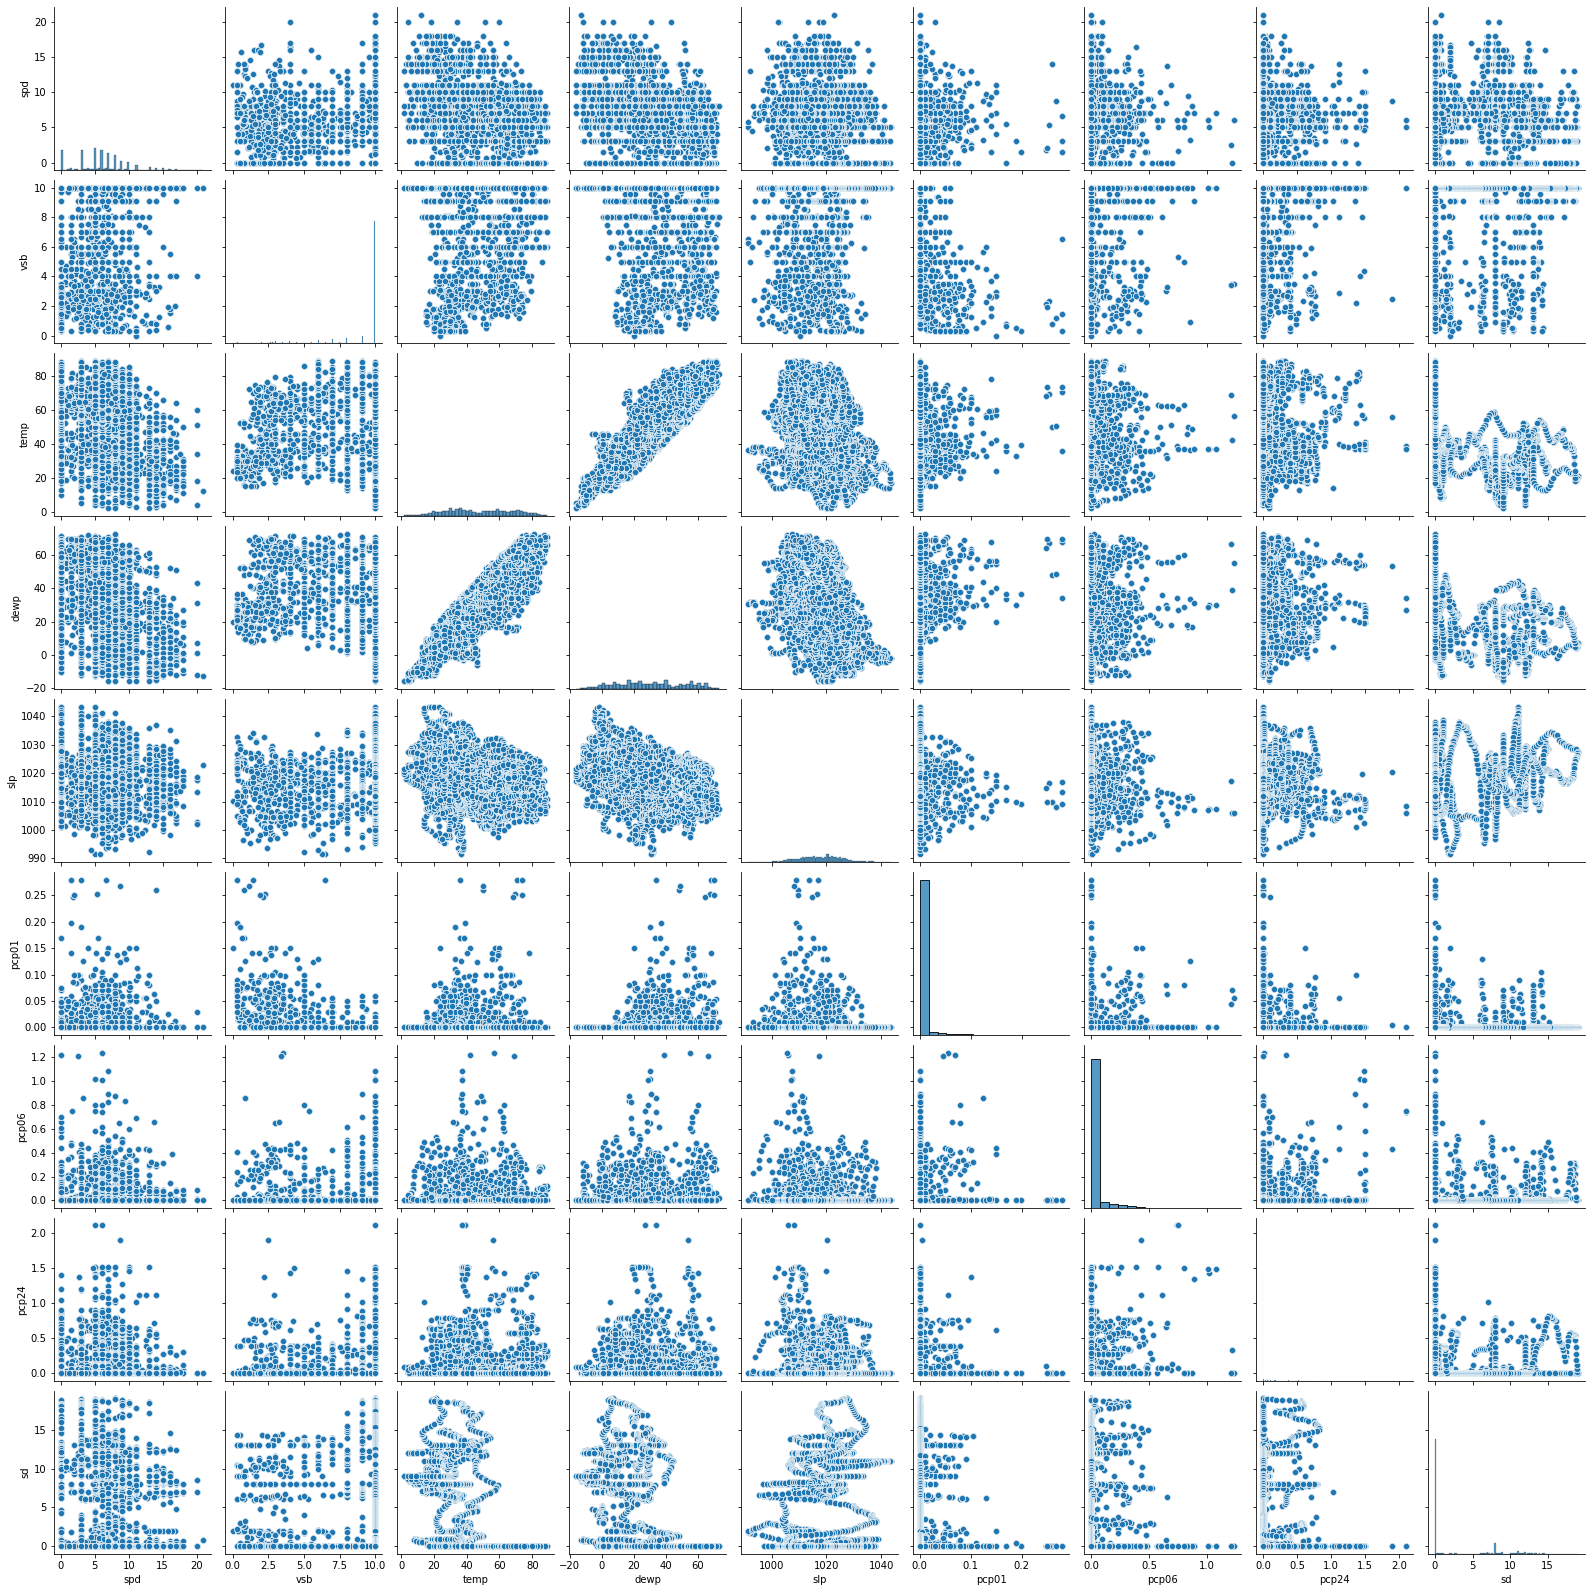

In [204]:
sns.pairplot(uber[weather_vars])

**Observations**
* As expected, temperature shows high correlation with dew point
* Visibility is negatively correlated with precipitation. If the rains are high during the hour, visibility is low. This is inline with our intuitive understanding. 
* Snow depth of course would be negatively correlated with temperature.
* Wind speed and sea level pressure is negatively correlated with temperature. As the temperature increases, wind speeds decrease and so does sea level pressure. 
* It is important to note that correlation does not imply causation.
* There does not seem to be a strong relationship between number of pickups and weather stats. 
* These pairplots look odd because there is strong autocorrelation amongst all these variables.

### Bivariate Scatter Plots

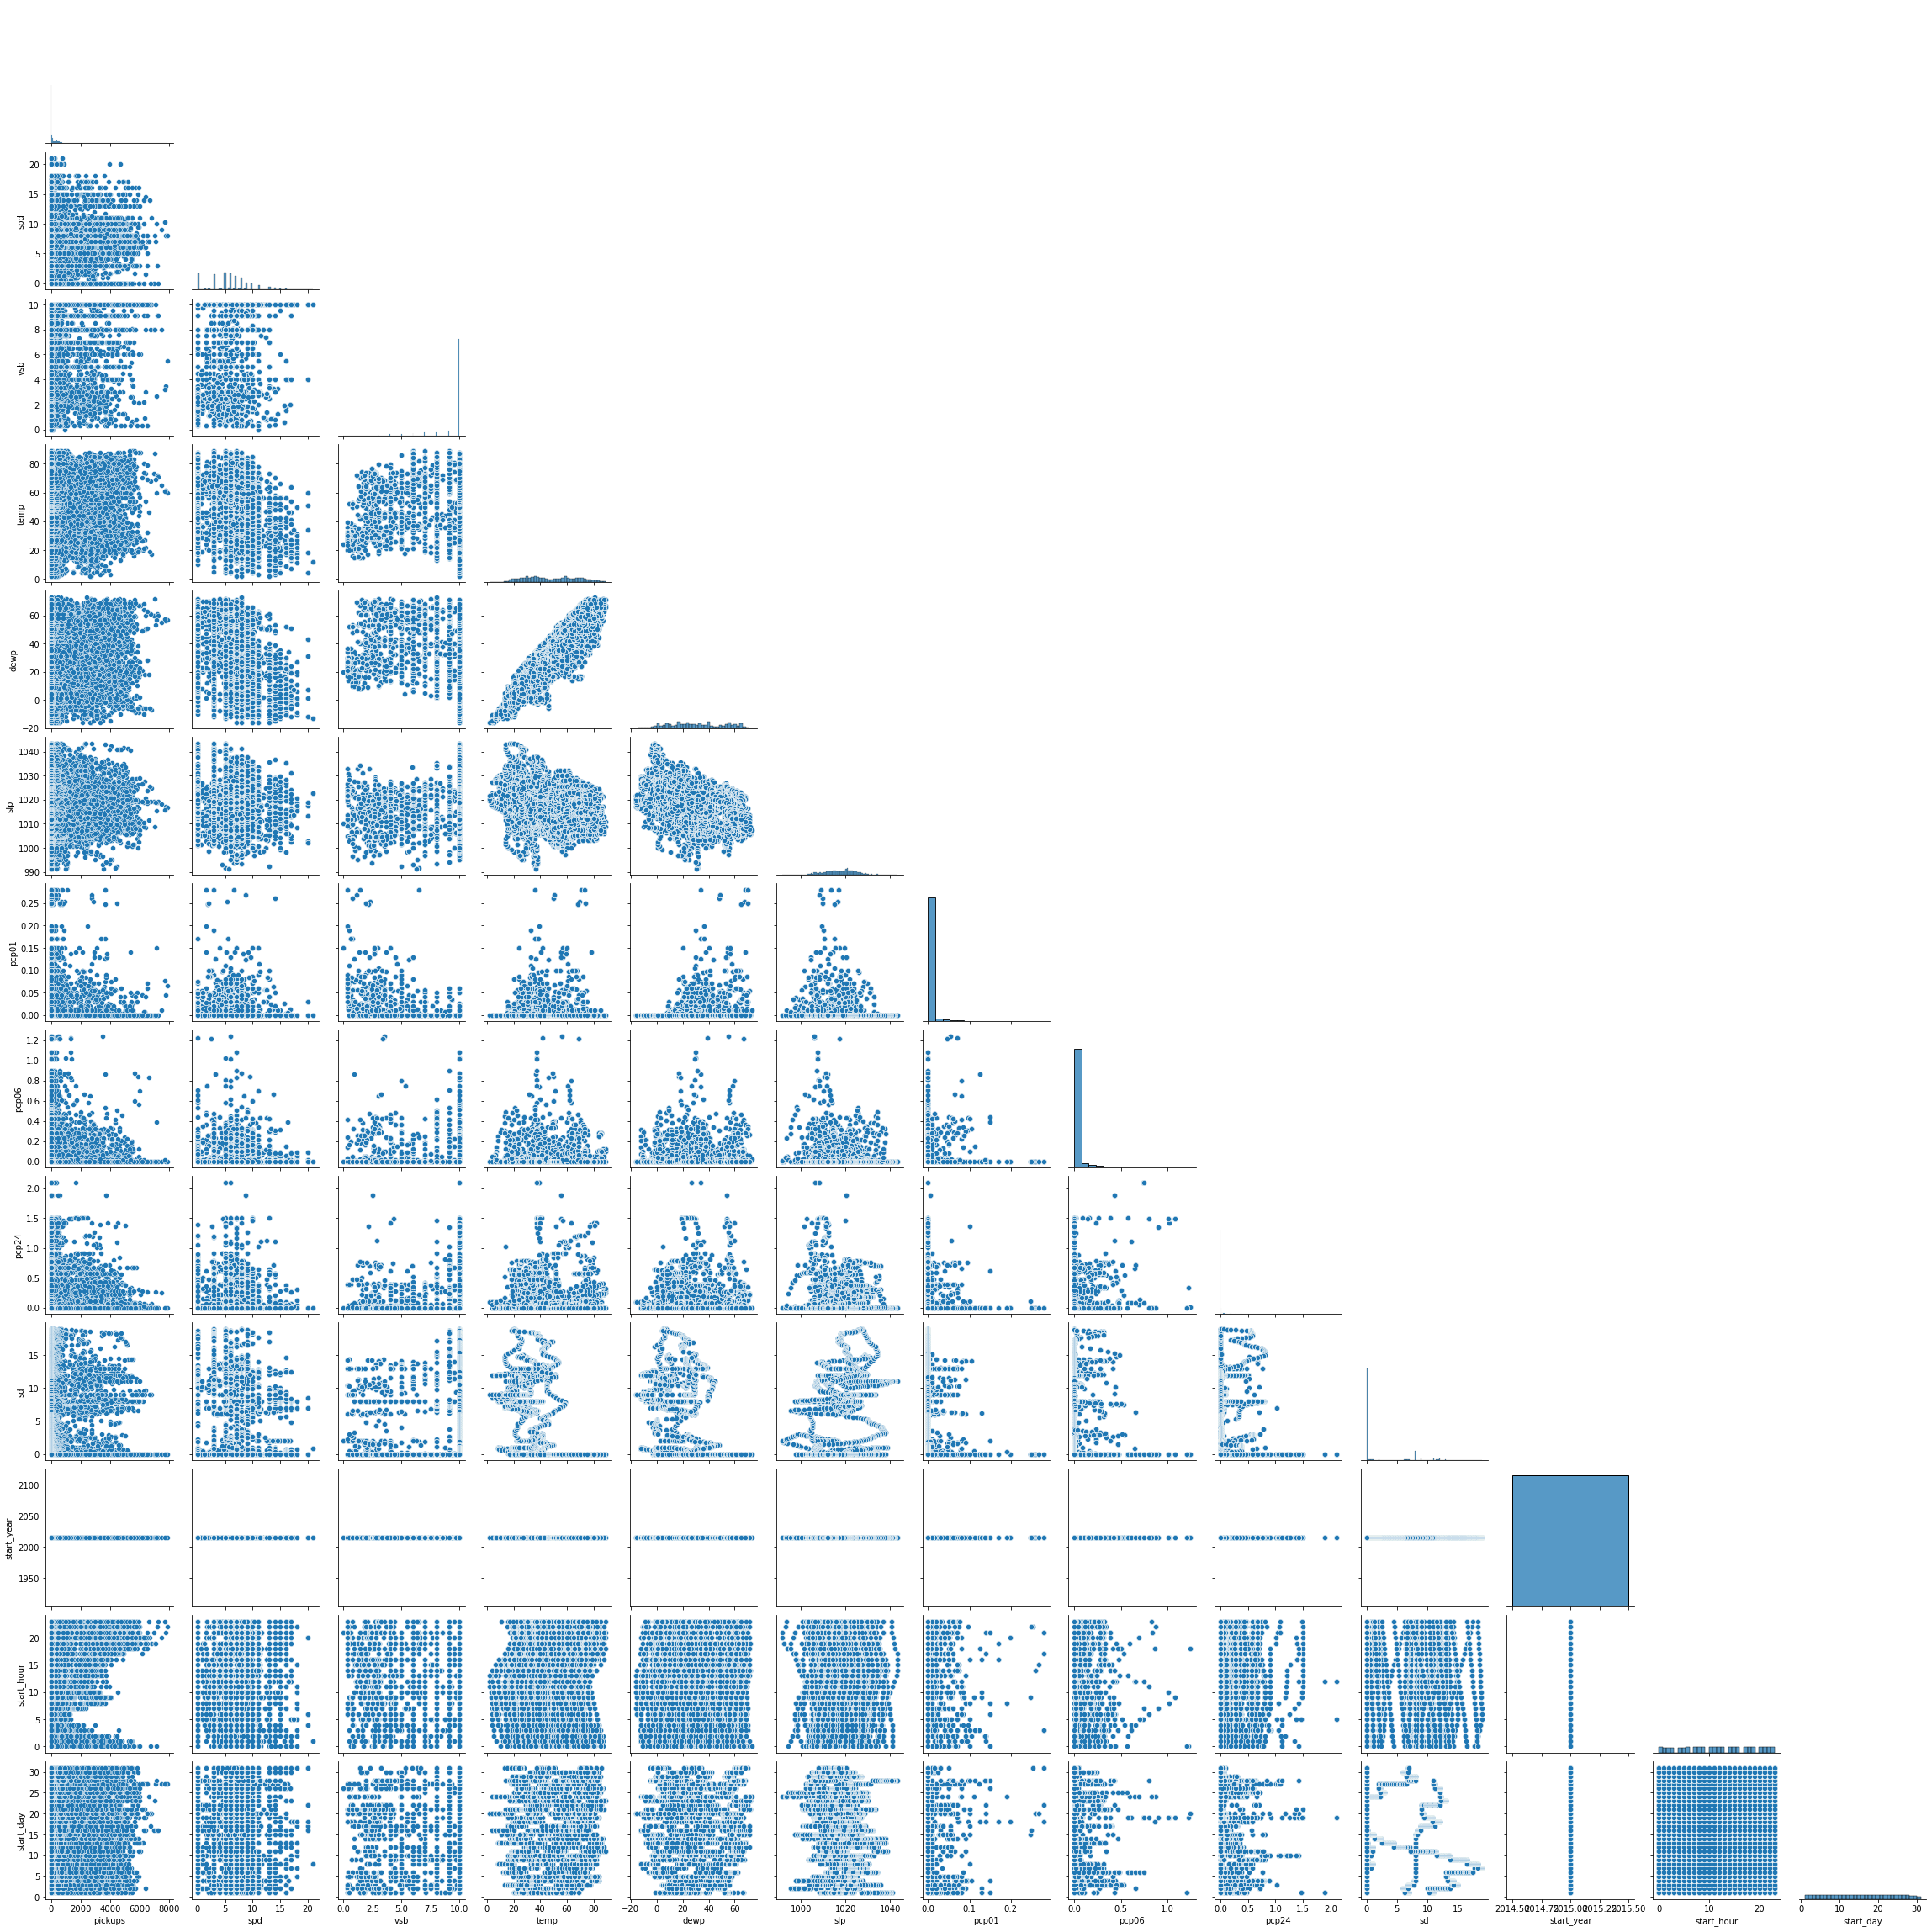

In [173]:
sns.pairplot(uber[num_var], corner=True)

**Observations**
* we get the same observation as from the correlation plot
* There does not seem to be a strong relationship between number of pickups and weather stats. 

### Relationship between pickups and time based variables

#### Pickups across months

In [181]:
uber['week_day'].unique().tolist()

['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday']

Text(0.5, 0, 'Month')

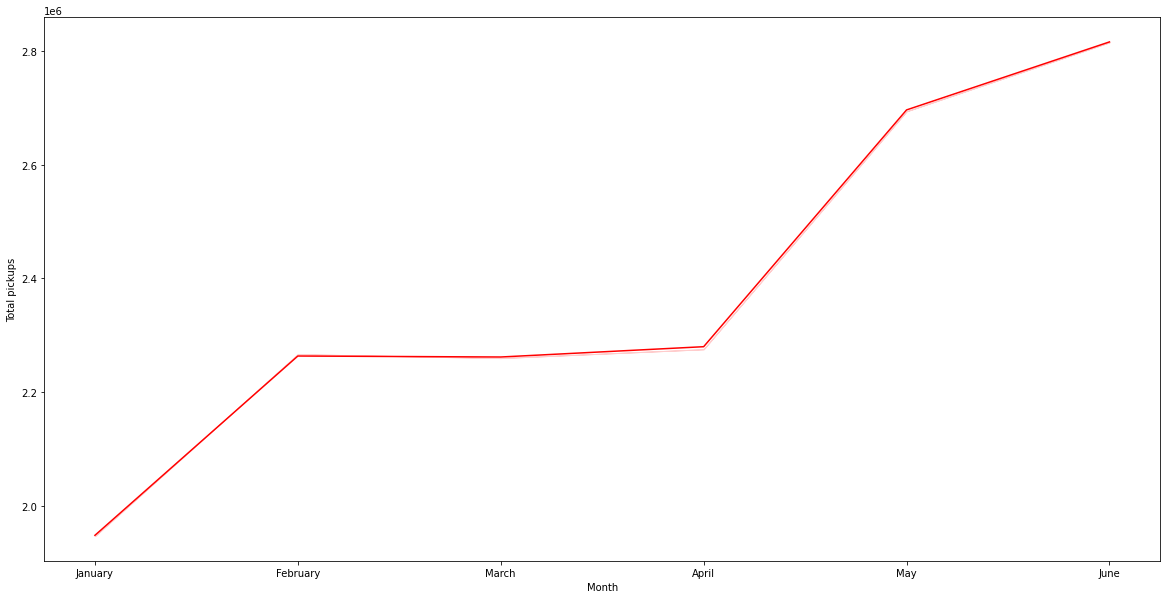

In [185]:
plt.figure(figsize=(20,10))
sns.lineplot(x='start_month', y='pickups', data=uber, ci=0, color="RED", estimator='sum')
plt.ylabel('Total pickups')
plt.xlabel('Month')

**Observations**
* There is clear increasing trend in monthly bookings
* Bookings in June are almost 1.5 times that of Jan

#### Pickups vs Days of the Month

Text(0.5, 0, 'Day of Month')

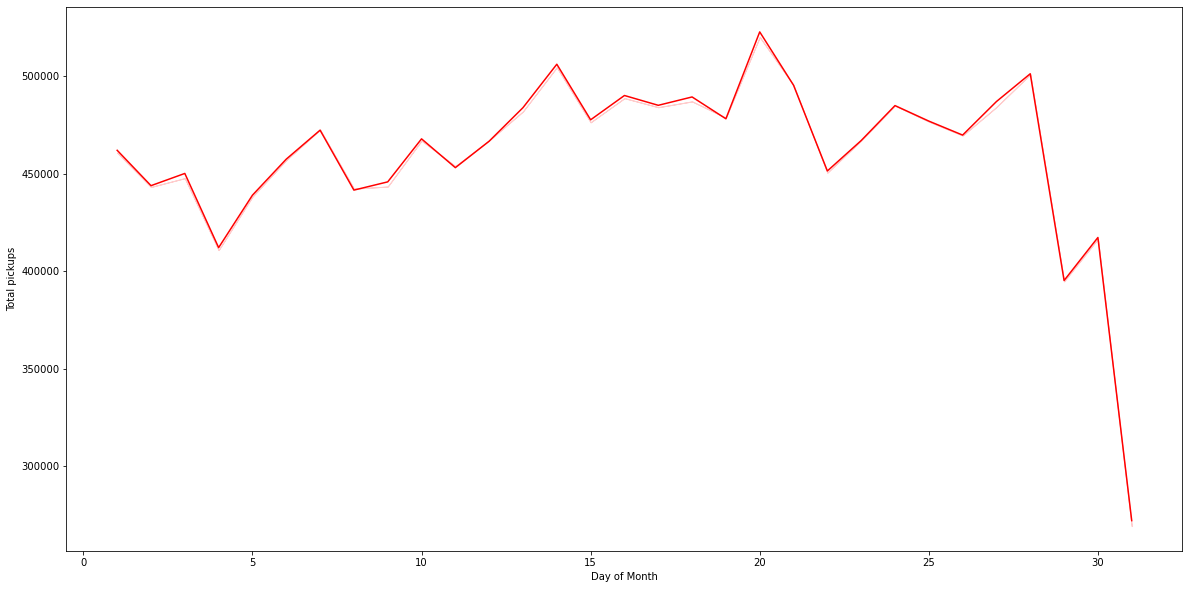

In [186]:
plt.figure(figsize=(20,10))
sns.lineplot(x='start_day', y='pickups', estimator='sum', ci=0, data=uber, color="RED")
plt.ylabel('Total pickups')
plt.xlabel('Day of Month')

**Observations**
* There is a steepfall in the bookings on the last day of the month.
* This can partially be attributed to month of Feb having just 28 days. We can drop Feb and have a look at this chart again.
* There is a peak in the bookings around 20th day of month

Text(0.5, 0, 'Day of Month')

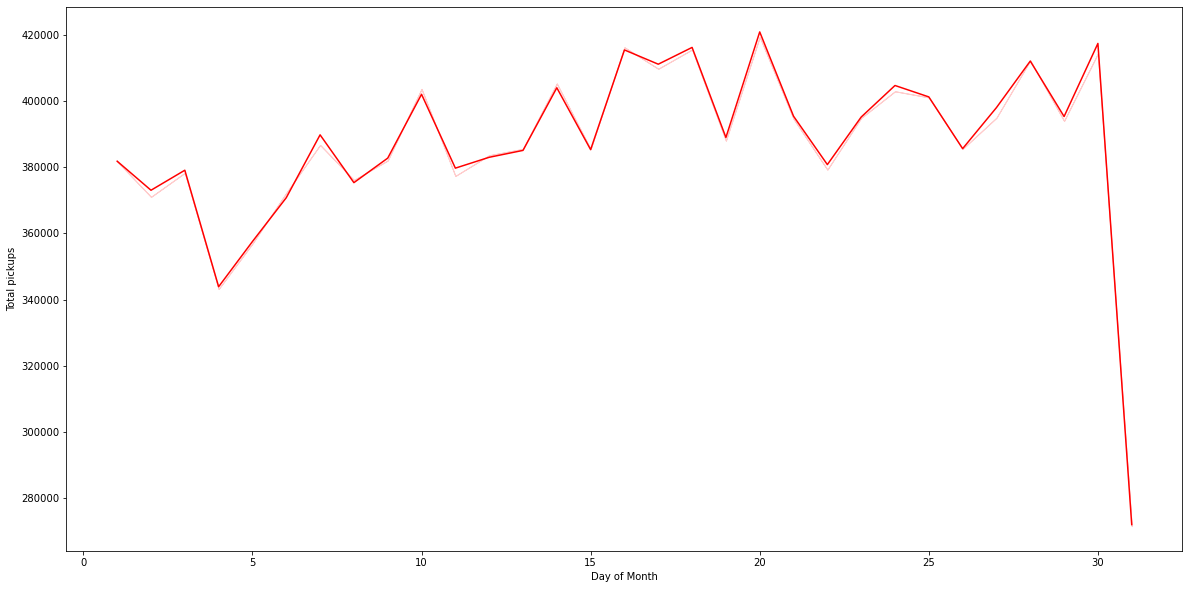

In [45]:
# lets us drop the feb month and see
no_feb =  uber[uber['start_month'] != 'February']
plt.figure(figsize=(20,10))
sns.lineplot(x='start_day', y='pickups', estimator='sum', ci=0, data=no_feb, color="RED")
plt.ylabel('Total pickups')
plt.xlabel('Day of Month')

**Observations**
* We see the expected increase in relative position of number of pickups on 29th to 30th
* Number of pickups for 31 is still low because not all months have the 31st day.

#### Pickups across Hour of Day

Text(0.5, 0, 'Hour of the day')

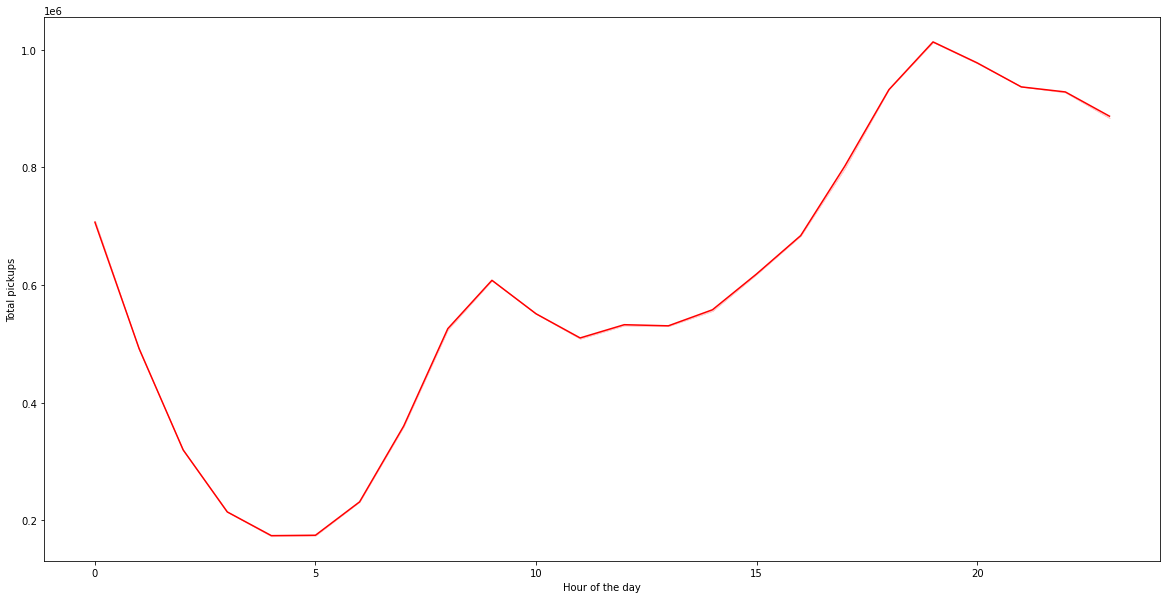

In [188]:
plt.figure(figsize=(20,10))
sns.lineplot(x='start_hour', y='pickups', estimator='sum', ci=0, data=uber, color="RED")
plt.ylabel('Total pickups')
plt.xlabel('Hour of the day')

**Observations**
* Bookings peak around 19th and 20th hour of the day and decreases till 5 AM in the morning.
* The peak can be attributed to the time people leave their workplaces
* From 5 AM onwards, we can see an increasing trend till 10, possibly the office rush.
* Pickups then go down from 10AM to 12PM post which they start increasing.

#### Pickups across Weekdays

Text(0.5, 0, 'Weekdays')

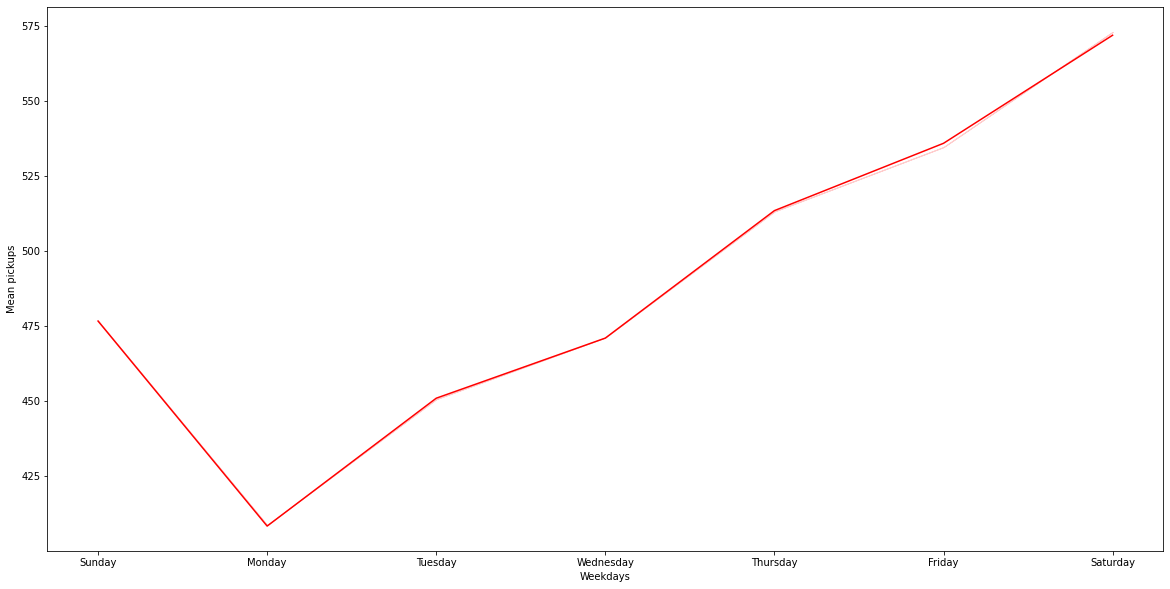

In [190]:
plt.figure(figsize=(20,10))
sns.lineplot(x='week_day', y='pickups', ci=0, data=uber, color='RED')
plt.ylabel('Mean pickups')
plt.xlabel('Weekdays')


**Observations**
* Pickups gradually increase as the week progresses and starts dropping down after saturday.
* We need to do more investigation to understand why demand for Ubers is low in the beginning of the week.

#### Pickups across Borough

Text(0.5, 0, 'Borough')

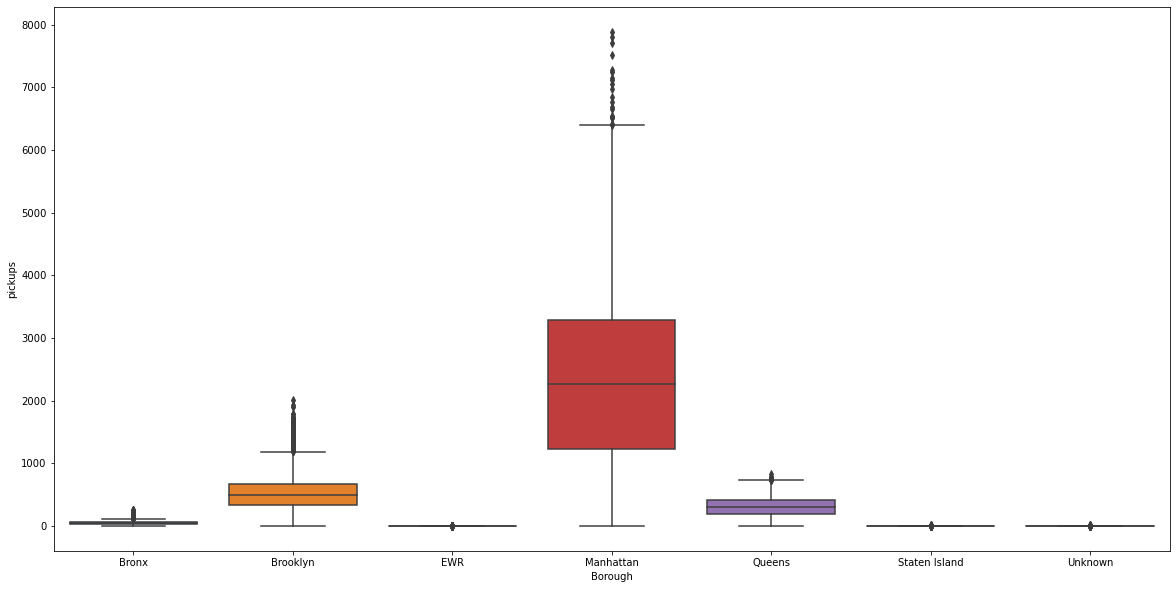

In [191]:
plt.figure(figsize=(20,10))           
sns.boxplot(x=uber['borough'], y=uber['pickups'])
plt.ylabel('pickups')
plt.xlabel('Borough')

**Observations**
* There is a clear difference in ridership across the different boroughs.
* Manhattan has the highest no of bookings
* Brooklyn and Queens are distant followers
* EWR, Unknown and Staten Island have very low bookings. The demand is so small that probably it can be covered by the drop-offs of the inbound trips from other areas.

In [48]:
# Dispersion of pickups in every borough
sns.catplot(x='pickups',
             col='borough', 
             data=uber,
             col_wrap=4,
             kind='count')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f4d0ed565e0> (for post_execute):


KeyboardInterrupt: 

**Observations**
* Manhatten and Brooklyn pickups distribution is right skewed while Queens pickups distribution follows normal distribution.


#### Relationship between pickups and holidays

In [49]:
uber.groupby('hday')['pickups'].mean()

hday
N    492.339957
Y    437.199822
Name: pickups, dtype: float64

In [196]:
# Check if the trend is similar across boroughs
uber.groupby(by=['borough', 'hday'])['pickups'].mean()

borough        hday
Bronx          N         50.771073
               Y         48.065868
Brooklyn       N        534.727969
               Y        527.011976
EWR            N          0.023467
               Y          0.041916
Manhattan      N       2401.302921
               Y       2035.928144
Queens         N        308.899904
               Y        320.730539
Staten Island  N          1.606082
               Y          1.497006
Unknown        N          2.057456
               Y          2.050420
Name: pickups, dtype: float64

**Observations**
1. The mean pickups on holidays is lower than on non-holidays.
2. Excepting Manhattan, mean pickups on a holiday is very similar to a non holiday.
3. In Queens, mean pickups on a holiday are higher.
4. There are hardly any pickups in EWR.

## Multivariate Analysis

Text(0.5, 0, 'Hour of the day')

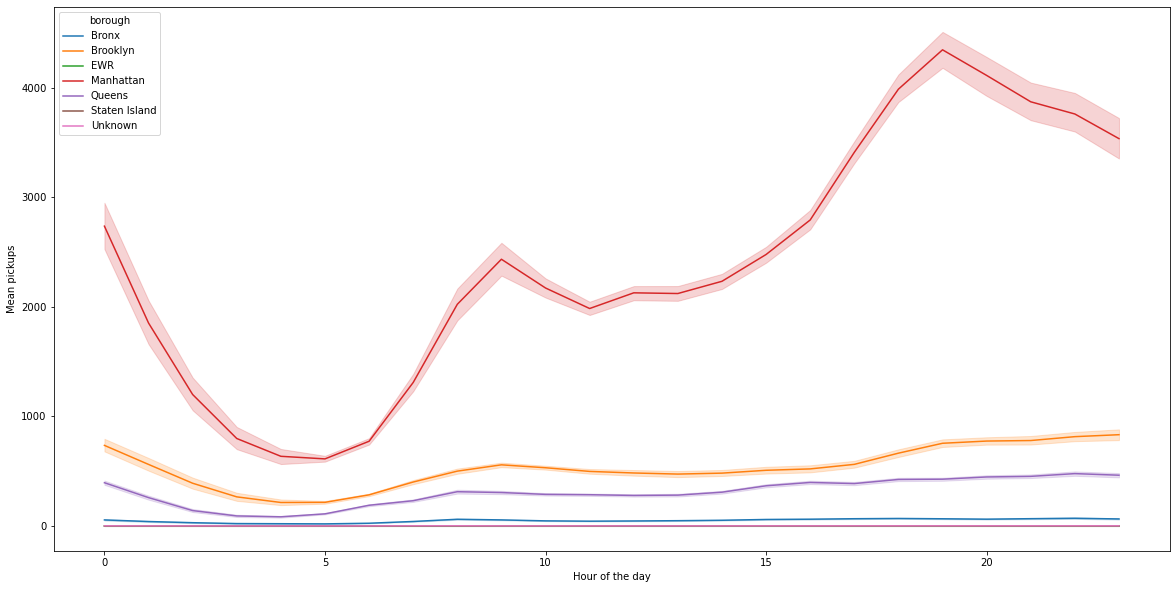

In [194]:
plt.figure(figsize=(20,10))
sns.lineplot(x='start_hour', y='pickups', ci=95, data=uber, hue='borough')
plt.ylabel('Mean pickups')
plt.xlabel('Hour of the day')


The number of pickups in Manhattan is very high and dominant when we see the spread across boroughs. Let us try converting the pickups on a logrithmic scale.

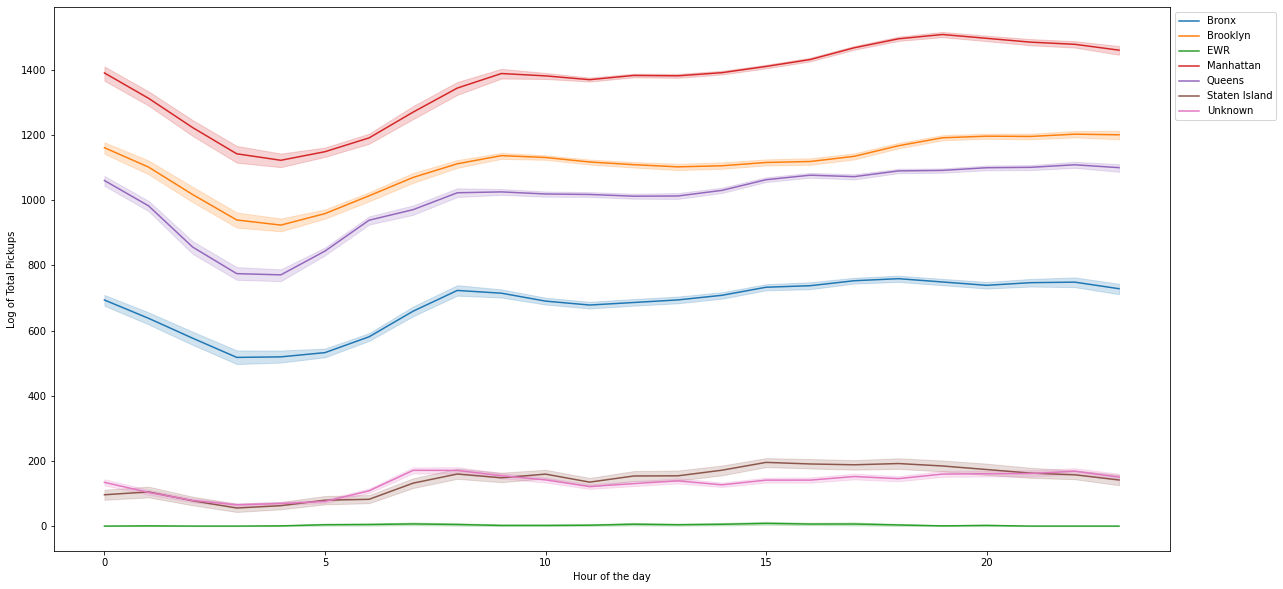

In [52]:
plt.figure(figsize=(20,10))
sns.lineplot(x='start_hour', y=np.log1p(uber['pickups']), estimator='sum', ci=95, hue='borough', data=uber)
plt.ylabel('Log of Total Pickups')
plt.xlabel('Hour of the day')
plt.legend(bbox_to_anchor=(1, 1))

**Observations**
* Hourly pattern can be seen in all the boroghs. 
* Especially on the second plot where a logarithmic scale has been applied to Y axis, it is obvious that the 4 major boroughs follow the exact same pattern. 
* The value of Staten Island and Unknown are more scattered
* EWR seems to have a random demand with the majority of the values being zero with a few 1s and 2s.
* Borough and hour of the day combined could be good predictors of pickups.
* Manhattan sees the most uber pickups. Let us explore this borough in more details.

#### Manhattan Pickups Heatmap - Weekday + Hour

<AxesSubplot:xlabel='week_day', ylabel='start_hour'>

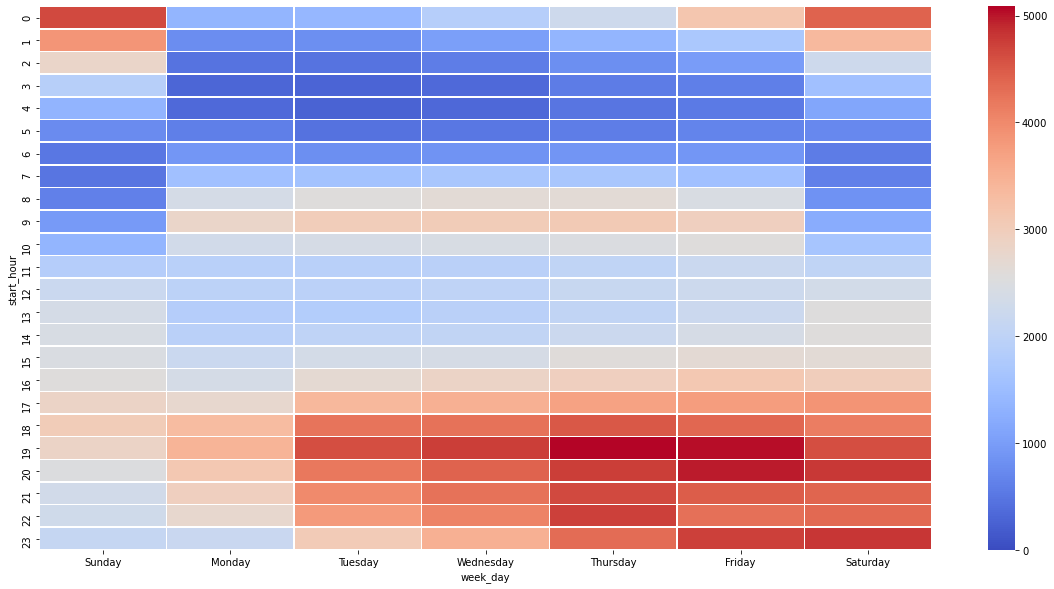

In [199]:
manhattan = uber[uber['borough'] == 'Manhattan']
manhattan_pivot = manhattan.pivot_table(index='start_hour', columns='week_day', values='pickups')
# Draw a heatmap 
plt.figure(figsize=(20,10)) # To resize the plot
sns.heatmap(manhattan_pivot,  fmt='d', cmap='coolwarm', linewidths=.5, vmin=0)

**Observations**
* The demand for Uber peaks during the late hours of the day when people are returning home from office.
* Demand continues to be high during the late hours of the day (midnight) on fridays and saturdays.  
* It is odd that the demand of Uber is no as high on monday evenings as compared to other working days.

### Let us see if a similar trend exists in Brooklyn

<AxesSubplot:xlabel='week_day', ylabel='start_hour'>

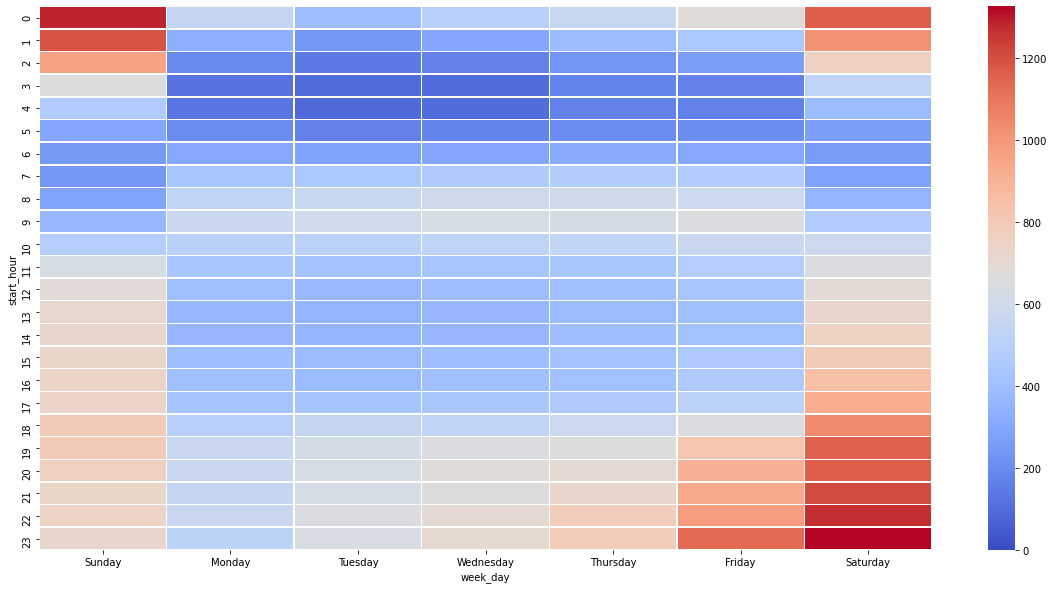

In [54]:
df_br = uber[uber['borough']=='Brooklyn']
df_hm =df_br.pivot_table(index = 'start_hour',columns ='week_day',values ='pickups')
# Draw a heatmap 
plt.figure(figsize = (20,10)) # To resize the plot
sns.heatmap(df_hm,  fmt="d", cmap='coolwarm',linewidths=.5, vmin = 0)

* In Brooklyn, the trend of high uber demand during the late hours of friday and saturday is more pronounced.

# **Conclusion and Recommendations**

## Conclusion

We analysed a dataset of nearly 30K hourly Uber pickup information, from New York boroughs.
The data spanned everyday of first six months of the year 2015.
The main feature of interest here is the number of pickups. 
Both from environmental and business perspective, having cars roaming in an area while the demand is in another or filling the streets with cars during a low demand period while lacking during peak hours is inefficient. Thus we determined the factors that affect pickup and the nature of their effect.

We have been able to conclude that 

1. Uber cabs are most popular in the Manhattan area of New York.
2. Contrary to intuition, weather conditions do not have much impact on the number of Uber pickups.
3. The demand for Ubers has been increasing steadily over the months (Jan to June).
4. The rate of pickups is higher on the weekends as compared to weekdays.
5. It is encouraging to see that New Yorkers trust Uber taxi services when they step out to enjoy their evenings.
6. We can also conclude that people use Ubers for regular office commutes. The demand steadily increases from 6AM to 10AM in the morning,then declines a little and starts picking up at 12PM. The demand peaks at 7-8 PM at night.
7. We need to further investigate the low demand for Ubers on Mondays.


## Recommendation to business

1. Manhattan is the most mature market for Uber. Brooklyn, Queens and Bronx show potential. 
2. There has been a gradual increase in Uber rides over the last few months and we need to keep up the momentum.
3. Riderships are high at peak office commute hours on week days and during late evenings on Saturday. Cab availability must be ensured during these times.
4. The demand for cabs is highest during saturday nights. Cab availability must be ensured during this timeof the week.
5. Procure data for fleet size availability to get a better understanding of demand-supply status and build a machine learning model to accurately predict pickups per hour, to optimise the cab fleet in respective areas.
6. Procure more data on price and build a model that can predict optimal pricing.

##  Furthur Analysis

1. Dig deeper to explore the variation in cab demand, during working days and non-working days. You can combine Weekends+Holiday to be Non-working days and Weekdays to be the working days.
2. Drop the boroughs that have negligible pickups and then analyse the data to uncover more insights.
3. Try automated data profiling using Pandas Profiling. 

In [67]:
uber = uber.sort_values(by=['borough', 'pickup_dt']).reset_index(drop=True)
uber['pickups_lag'] = uber.groupby('borough')['pickups'].shift(-1)
uber.head()


uber[['pickup_dt', 'borough', 'pickups', 'pickups_lag']]

,pickup_dt,borough,pickups,pickups_lag
0,2015-01-01 01:00:00,Bronx,152,120.0
1,2015-01-01 02:00:00,Bronx,120,132.0
2,2015-01-01 03:00:00,Bronx,132,128.0
3,2015-01-01 04:00:00,Bronx,128,87.0
4,2015-01-01 05:00:00,Bronx,87,65.0
...,...,...,...,...
29096,2015-06-30 17:00:00,Unknown,1,2.0
29097,2015-06-30 18:00:00,Unknown,2,4.0
29098,2015-06-30 19:00:00,Unknown,4,5.0
29099,2015-06-30 20:00:00,Unknown,5,3.0


<AxesSubplot:xlabel='pcp01', ylabel='diff'>

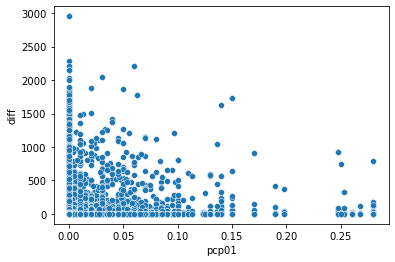

In [71]:
uber['diff'] = abs(uber['pickups'] - uber['pickups_lag'])
sns.scatterplot(x='pcp01', y='diff', data=uber)

In [59]:
uber.sort_values(by=['pickup_dt', 'borough'])

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,start_year,start_month,start_hour,start_day,week_day,pickups_lag
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday,NaN
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday,NaN
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday,NaN
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday,NaN
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29096,2015-06-30 23:00:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,2015,June,23,30,Tuesday,0.0
29097,2015-06-30 23:00:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,2015,June,23,30,Tuesday,4452.0
29098,2015-06-30 23:00:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,2015,June,23,30,Tuesday,556.0
29099,2015-06-30 23:00:00,Staten Island,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,2015,June,23,30,Tuesday,2.0


<AxesSubplot:xlabel='pickups_lag', ylabel='pickups'>

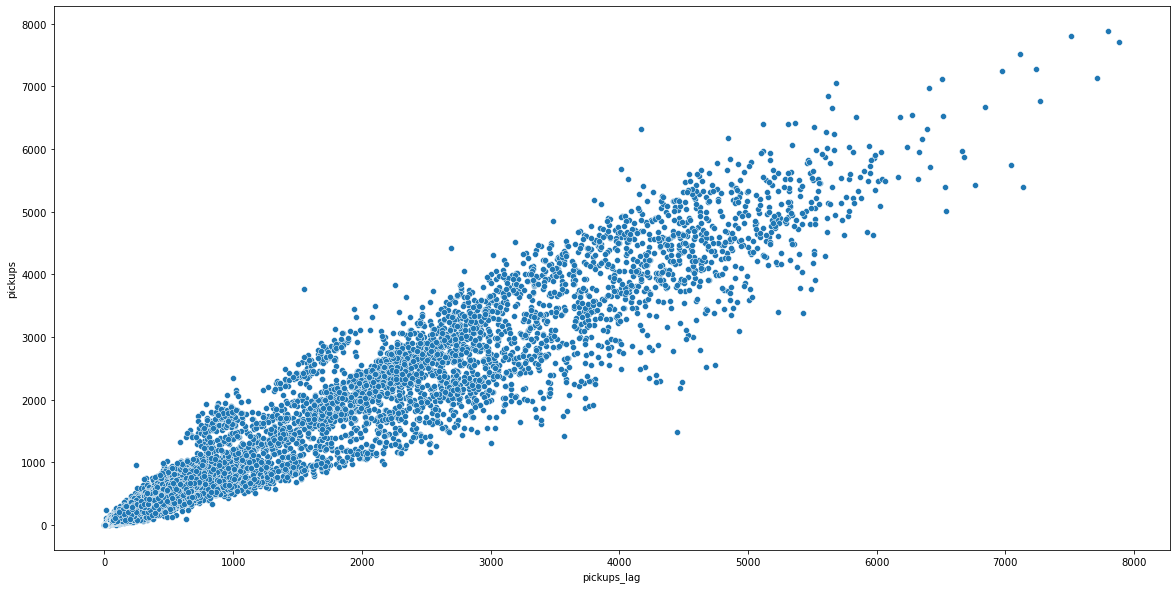

In [225]:
plt.figure(figsize = (20,10)) # To resize the plot
sns.scatterplot(x='pickups_lag', y='pickups', data=uber)

In [61]:
from statsmodels.api import OLS, graphics

no_nans = uber.dropna(inplace=False)

linear_model = OLS(no_nans['pickups'], no_nans[['pickups_lag'] + weather_vars])

residuals = linear_model.fit()

residuals.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                pickups   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                          7.229e+04
Date:                Sun, 20 Jun 2021   Prob (F-statistic):                        0.00
Time:                        14:49:46   Log-Likelihood:                     -1.9796e+05
No. Observations:               29094   AIC:                                  3.959e+05
Df Residuals:                   29084   BIC:                                  3.960e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
pickups_lag     0.9753      0.001    756.179      0.000       0.973       0.978
spd             0.4544      0.366      1.241      0.214      -0.263       1.172
vsb            -1.1809      0.705     -1.676      0.094      -2.562       0.200
temp            0.2700      0.178      1.516      0.130      -0.079       0.619
dewp           -0.1835      0.167     -1.100      0.271      -0.511       0.144
slp             0.0136      0.008      1.807      0.071      -0.001       0.028
pcp01        -340.9412     77.767     -4.384      0.000    -493.368    -188.515
pcp06         -11.2732     14.374     -0.784      0.433     -39.447      16.900
pcp24          -0.9378      6.052     -0.155      0.877     -12.799      10.923
sd              0.1378      0.341      0.404      0.686      -0.531       0.807
==============================================================================
Omnibus:                     7016.626   Durbin-Watson:                   0.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           386324.732
Skew:                          -0.241   Prob(JB):                         0.00
Kurtosis:                      20.845   Cond. No.                     7.80e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
linear_model = OLS(no_nans['pickups'], no_nans[ weather_vars])

residuals = linear_model.fit()

residuals.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                pickups   R-squared (uncentered):                   0.201
Model:                            OLS   Adj. R-squared (uncentered):              0.201
Method:                 Least Squares   F-statistic:                              812.7
Date:                Sun, 20 Jun 2021   Prob (F-statistic):                        0.00
Time:                        14:49:50   Log-Likelihood:                     -2.4201e+05
No. Observations:               29094   AIC:                                  4.840e+05
Df Residuals:                   29085   BIC:                                  4.841e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
spd            7.8125      1.663      4.698      0.000       4.553      11.072
vsb          -16.7295      3.202     -5.225      0.000     -23.006     -10.453
temp           9.7823      0.807     12.115      0.000       8.200      11.365
dewp          -5.7908      0.758     -7.643      0.000      -7.276      -4.306
slp            0.2858      0.034      8.356      0.000       0.219       0.353
pcp01         48.8466    353.466      0.138      0.890    -643.963     741.656
pcp06         49.0426     65.333      0.751      0.453     -79.013     177.098
pcp24        -91.2689     27.501     -3.319      0.001    -145.171     -37.366
sd             7.4659      1.551      4.814      0.000       4.426      10.505
==============================================================================
Omnibus:                    17600.816   Durbin-Watson:                   0.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           140952.893
Skew:                           2.934   Prob(JB):                         0.00
Kurtosis:                      12.046   Cond. No.                     6.20e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

KeyboardInterrupt: 

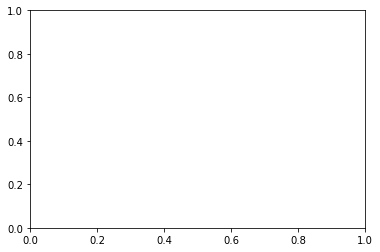

In [231]:
fig = graphics.influence_plot(residuals, criterion="cooks")
fig.tight_layout(pad=1.0)

Or,
Install pandas-profiling using anaconda prompt, Use the command ->
conda install -c conda-forge pandas-profiling

In [201]:
from pandasprofiling import ProfileReport
# Use the original dataframe, so that original features are considered
prof = ProfileReport(uber)
# to view report created by pandas profile
prof

ModuleNotFoundError: No module named 'pandasprofiling'

In [57]:
# to save report obtained via pandas profiling
prof.to_file('output.html')